In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [21]:
df1 = pd.read_csv('../data/raw/GB_sessions_2020-01-01_2020-12-31.csv')
df2 = pd.read_csv('../data/raw/GB_sessions_2021-01-01_2021-06-30.csv')
df3 = pd.read_csv('../data/raw/GB_sessions_2021-07-01_2021-12-31.csv')
df4 = pd.read_csv('../data/processed/GB_sessions_2022-01-01_2022-11-01.csv')

C:\Users\tijmen.vanetten\AppData\Local\Temp\ipykernel_15824\1412617651.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../data/raw/GB_sessions_2020-01-01_2020-12-31.csv')


In [22]:
df = df1.append(df2).append(df3).append(df4)

C:\Users\tijmen.vanetten\AppData\Local\Temp\ipykernel_15824\2035333280.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2).append(df3).append(df4)
C:\Users\tijmen.vanetten\AppData\Local\Temp\ipykernel_15824\2035333280.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2).append(df3).append(df4)


In [23]:
print(df.size)
df = df[df['LOCATION_SUB_TYPE'] != "On Street"]
print(df.size)

16273823
9859727


In [24]:
df.isna().sum()

SESSION_ID                       0
LOCATION_ID                      0
GEO_ID                           0
GEO_STRING                       0
GEO_NAME                         0
LOCATION_SUB_TYPE                0
CHARGEPOINT_ID                   0
CONNECTOR_ID                     0
POWER_TYPE                       0
POWER_KW                         0
EVSE_ID                          0
CUSTOMER_TYPE               183885
SESSION_START                    0
SESSION_STOP                     2
SESSION_DURATION_SECONDS         0
ENERGY_DELIVERED_KWH             0
COST_GROSS                       0
Unnamed: 0                  212077
DATE                        212077
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518933 entries, 0 to 306855
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SESSION_ID                518933 non-null  int64  
 1   LOCATION_ID               518933 non-null  int64  
 2   GEO_ID                    518933 non-null  int64  
 3   GEO_STRING                518933 non-null  object 
 4   GEO_NAME                  518933 non-null  object 
 5   LOCATION_SUB_TYPE         518933 non-null  object 
 6   CHARGEPOINT_ID            518933 non-null  object 
 7   CONNECTOR_ID              518933 non-null  int64  
 8   POWER_TYPE                518933 non-null  object 
 9   POWER_KW                  518933 non-null  float64
 10  EVSE_ID                   518933 non-null  int64  
 11  CUSTOMER_TYPE             335048 non-null  object 
 12  SESSION_START             518933 non-null  object 
 13  SESSION_STOP              518931 non-null  o

In [26]:
df.describe()

SESSION_ID   LOCATION_ID         GEO_ID  CONNECTOR_ID       POWER_KW  \
count  5.189330e+05  5.189330e+05  518933.000000  5.189330e+05  518933.000000   
mean   1.493399e+07  3.868523e+05   20683.007348  9.666158e+05      92.896344   
std    8.305679e+06  3.088858e+05    3024.873414  7.979814e+05      56.788625   
min    2.117620e+05  1.412050e+05   14221.000000  3.154730e+05      11.040000   
25%    7.236493e+06  1.412400e+05   18028.000000  3.155560e+05      50.000000   
50%    1.605542e+07  1.434090e+05   21166.000000  3.157170e+05      50.000000   
75%    1.874362e+07  7.643810e+05   23619.000000  1.844003e+06     175.000000   
max    2.872411e+07  1.192189e+06   24762.000000  3.372357e+06     175.000000   

            EVSE_ID  SESSION_DURATION_SECONDS  ENERGY_DELIVERED_KWH  \
count  5.189330e+05             518933.000000         518933.000000   
mean   1.024764e+06               2347.701908             23.745563   
std    9.824022e+05               1593.738354             15.342495   
min    2.850990e+05                  0.000000              0.500000   
25%    2.851300e+05               1319.000000             12.009000   
50%    2.851810e+05               2119.000000             21.297000   
75%    2.516910e+06               3077.000000             32.544000   
max    2.563863e+06             178124.000000            112.313000   

          COST_GROSS     Unnamed: 0  
count  518933.000000  306856.000000  
mean       11.051511  153433.824119  
std         7.930215   88585.660172  
min         0.000000       0.000000  
25%         5.180000   76717.750000  
50%         9.337200  153433.500000  
75%        15.112500  230151.250000  
max        76.580000  306868.000000

In [27]:
no_locations = df['LOCATION_ID'].nunique()
print(f"There are {no_locations} unique charging locations in total based on 'LOCATION_ID'.")

There are 147 unique charging locations in total based on 'LOCATION_ID'.


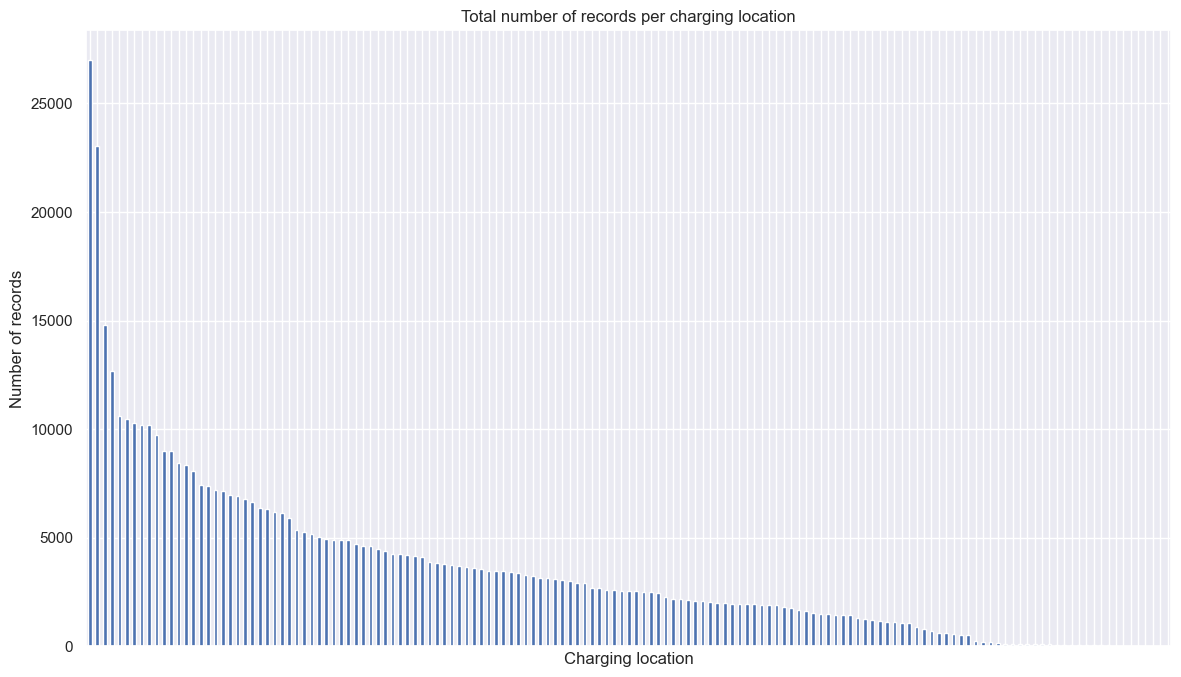

In [28]:
ax = df.groupby(['LOCATION_ID']).size().sort_values(ascending=False).plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) #
plt.ylabel('Number of records')
plt.xlabel('Charging location')
plt.title('Total number of records per charging location')
plt.show()

In [29]:
# aggregate to daily delivery
df['SESSION_STOP'] = pd.to_datetime(df['SESSION_STOP'])
df['DATE'] = df['SESSION_STOP'].dt.date
df_daily = df.groupby(['LOCATION_ID', 'DATE']).sum('ENERGY_DELIVERED_KWH')
df_locations = df_daily.groupby('LOCATION_ID')

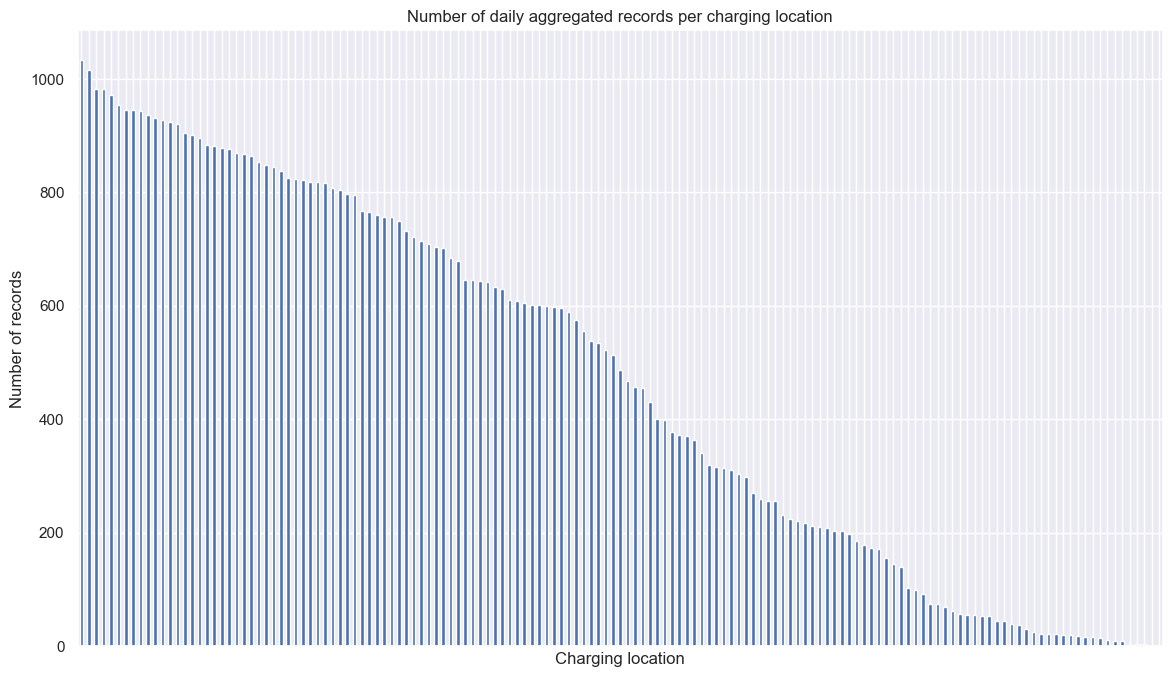

In [30]:
ax = df_locations.size().sort_values(ascending=False).reset_index()[0].plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) #
plt.ylabel('Number of records')
plt.xlabel('Charging location')
plt.title('Number of daily aggregated records per charging location')
plt.show()


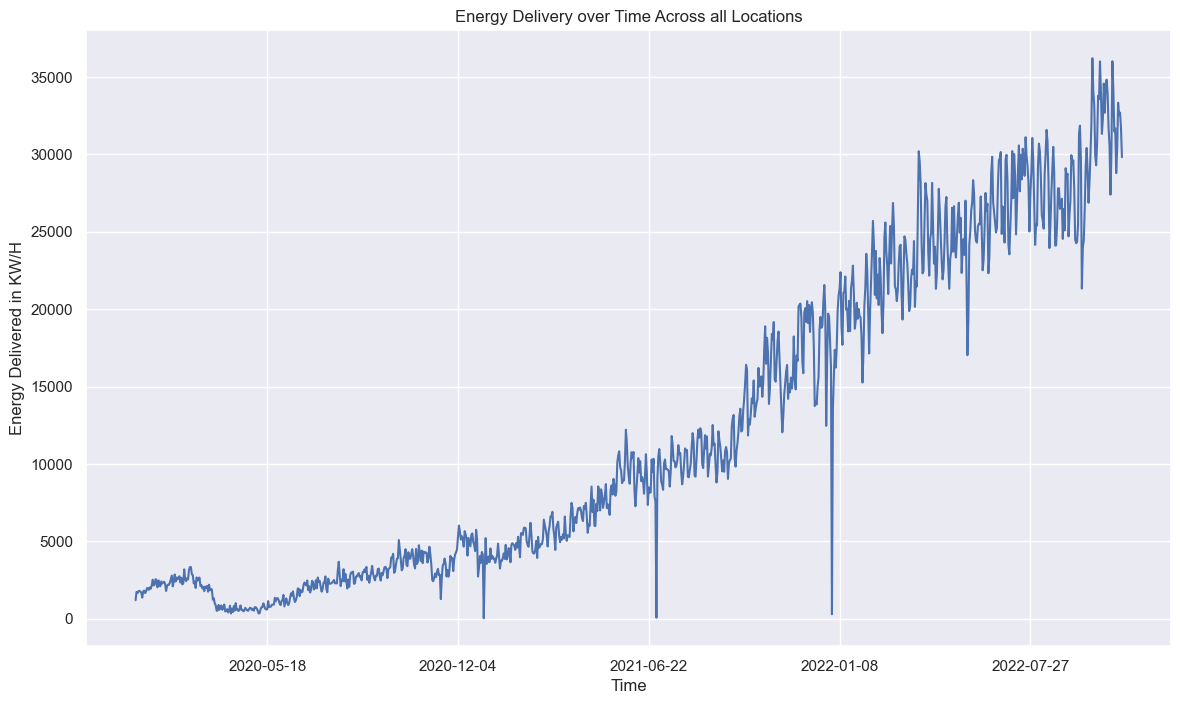

In [31]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_daily.groupby('DATE').sum("ENERGY_DELIVERED_KWH"), x ='DATE', y = 'ENERGY_DELIVERED_KWH')

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Energy Delivered in KW/H')
plt.xlabel('Time')
plt.title("Energy Delivery over Time Across all Locations")
plt.show()

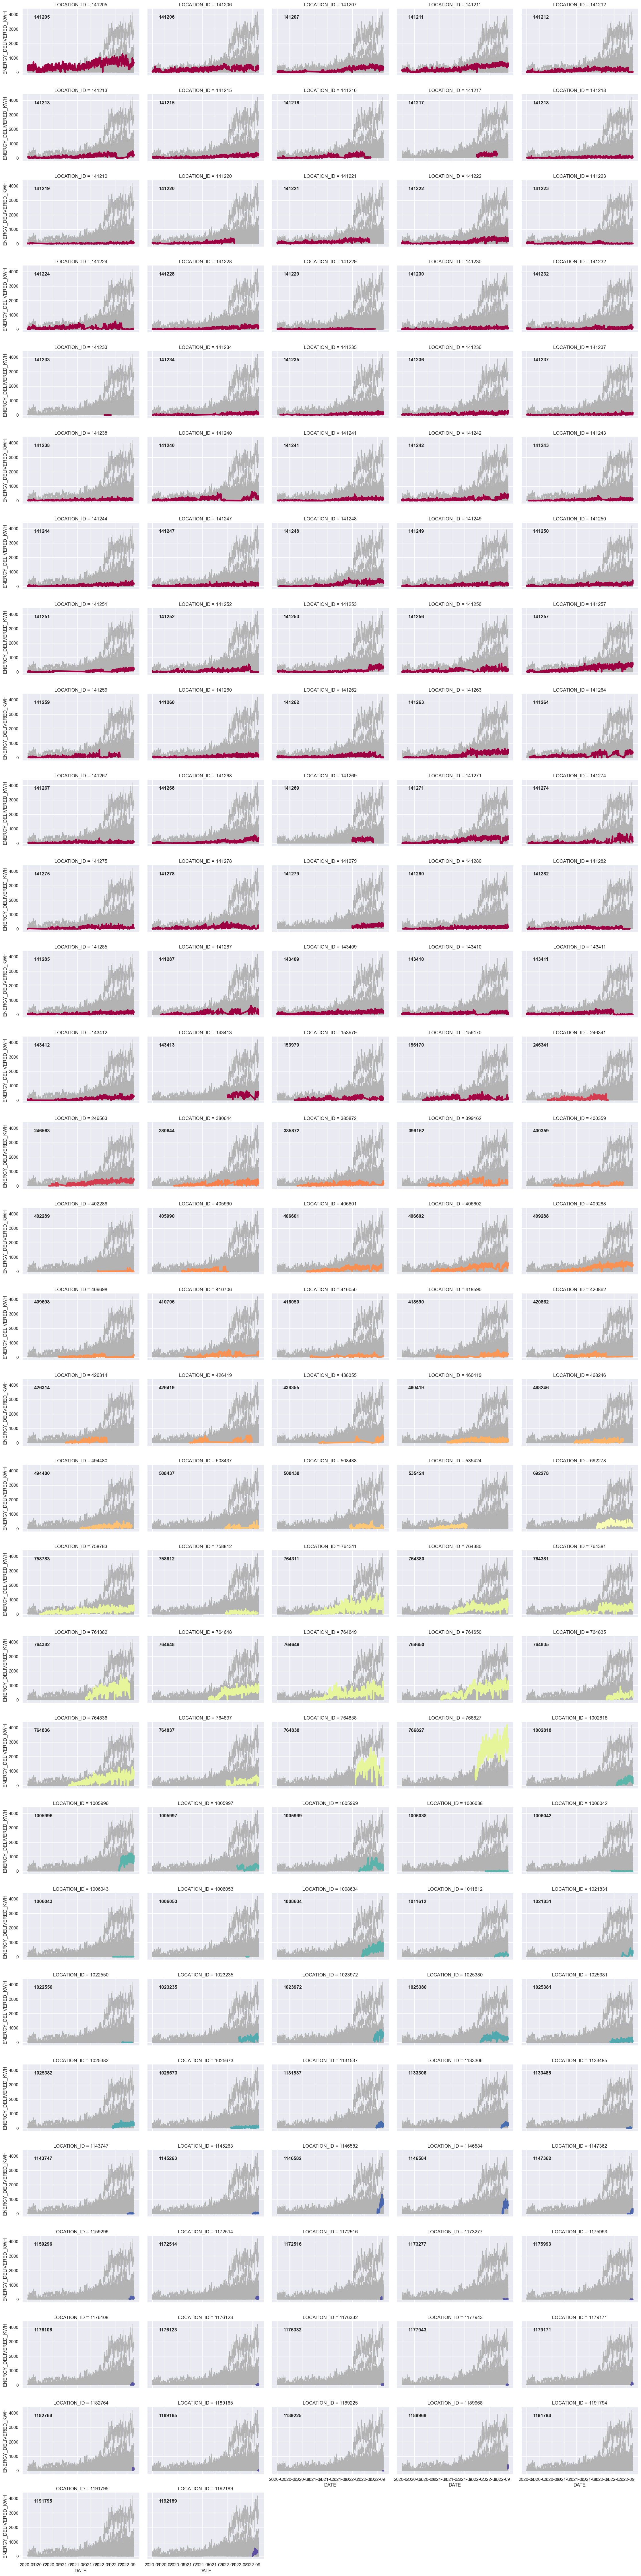

In [32]:

g = sns.relplot(data = df_daily, x = "DATE", y = "ENERGY_DELIVERED_KWH",
                col = "LOCATION_ID", hue = "LOCATION_ID",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df_daily, x = "DATE", y = "ENERGY_DELIVERED_KWH", units="LOCATION_ID",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

# ax.set_xticks('')
# g.set_titles("")
# g.set_axis_labels("", "ENERGY_DELIVERED_KWH")
g.tight_layout()
plt.show()

766827 Seems to be the most important location. Charging locations by mean daily energy delivery c onfirms this:

In [33]:
locations_ordered = df_locations['ENERGY_DELIVERED_KWH'].mean().sort_values(ascending=False)
locations_ordered

LOCATION_ID
766827     2479.237732
764838     1379.836907
1005996     754.831303
764382      677.904108
764650      663.475995
              ...     
1006043       7.793733
1006053       5.031111
1189225       4.890000
141233        3.731200
1191794       2.196000
Name: ENERGY_DELIVERED_KWH, Length: 147, dtype: float64

Visualising the most active charging location delivery:

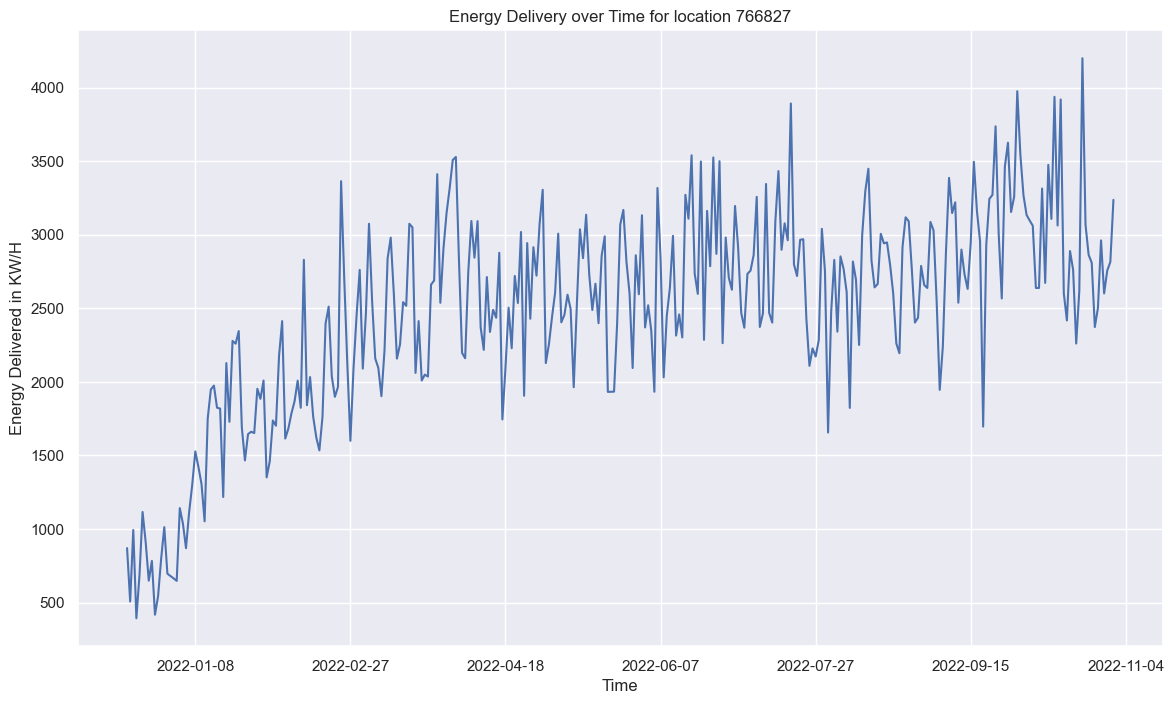

In [34]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=dict(list(df_locations))[766827], x ='DATE', y = 'ENERGY_DELIVERED_KWH')

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Energy Delivered in KW/H')
plt.xlabel('Time')
plt.title("Energy Delivery over Time for location 766827")
plt.show()

Visualising all locations by average daily charging demand

In [35]:
locations = pd.read_csv("../data/raw/GB_shell_recharge_locations.csv")

In [36]:
locations['LOCATION_SUB_TYPE'].value_counts()

On Street       5975
On Forecourt     120
Destination       40
Mobility Hub       1
Name: LOCATION_SUB_TYPE, dtype: int64

In [37]:
filtered_locs = locations[locations['LOCATION_ID'] in locations_ordered.index]

TypeError: unhashable type: 'Series'

In [ ]:
locations.index = locations['LOCATION_ID']

In [ ]:
locations_filtered = locations[locations.index.isin(locations_ordered.index)]

In [ ]:
locations_filtered['LOCATION_SUB_TYPE'].value_counts()

On Forecourt    112
Destination      32
Mobility Hub      1
Name: LOCATION_SUB_TYPE, dtype: int64